# 911 Calls Capstone Project 
Data Cleaning and Exploratory Data Analysis

For this capstone project we will be analyzing some 911 call data from Kaggle. The data contains the following fields:
lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('911.csv')

Data Cleaning
First of all we need to remove unnecessary columns, to be specific the dummy variable e

In [6]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
data=data.drop('e',axis=1)

In [10]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


Descriptive Analysis
Descriptive statistics are bellow

In [9]:
data.describe()

,lat,lng,zip
count,99492.000000,99492.000000,86637.000000
mean,40.159526,-75.317464,19237.658298
std,0.094446,0.174826,345.344914
min,30.333596,-95.595595,17752.000000
25%,40.100423,-75.392104,19038.000000
50%,40.145223,-75.304667,19401.000000
75%,40.229008,-75.212513,19446.000000
max,41.167156,-74.995041,77316.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


### Exploratory Data Analysis
We can make some frequency table and chart from the data to make a conclution about the data

The Top 10 Zipcodes for Emergency Calls
Find Area based on calls

#What are the top 5 zipcodes for 911 calls?

In [13]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [14]:
#What are the top 5 townships (twp) for 911 calls?

In [15]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [16]:
#Take a look at the 'title' column, how many unique title codes are there? 

In [17]:
data['title'].nunique()

110

In [18]:
top_10_zip=pd.DataFrame(data['zip'].value_counts().head(10))
top_10_zip.reset_index(inplace=True)
top_10_zip.columns=['ZIP','Count']
top_10_zip

,ZIP,Count
0,19401.0,6979
1,19464.0,6643
2,19403.0,4854
3,19446.0,4748
4,19406.0,3174
5,19002.0,3050
6,19468.0,2990
7,19454.0,2781
8,19090.0,2635
9,19038.0,2578


Bar Chart of the top 10 zip codes

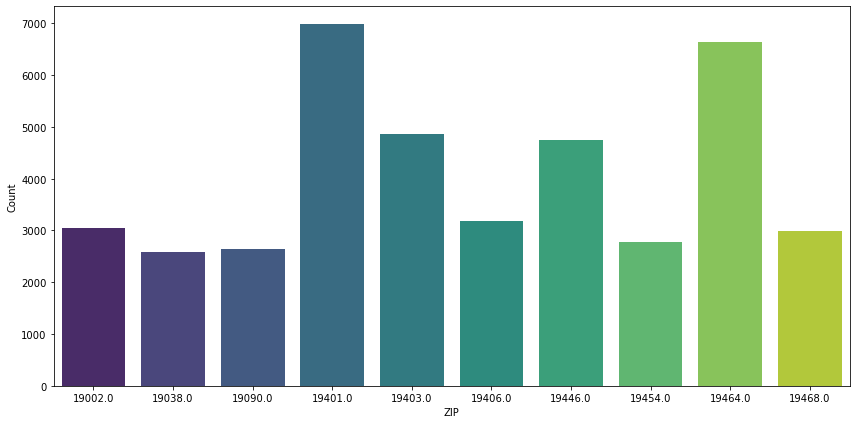

In [19]:
top_10_zip=pd.DataFrame(data['zip'].value_counts().head(10))
top_10_zip.reset_index(inplace=True)
top_10_zip.columns=['ZIP','Count']
fig1=plt.figure(figsize=(12,6))
sns.barplot(data=top_10_zip,x='ZIP',y='Count',palette="viridis")
fig1.tight_layout()

#The Top 10 townships for 911 calls

In [21]:
top_10_twp=pd.DataFrame(data['twp'].value_counts().head(10))
top_10_twp.reset_index(inplace=True)
top_10_twp.columns=['Township','Count']
top_10_twp

,Township,Count
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575
5,POTTSTOWN,4146
6,UPPER MORELAND,3434
7,LOWER PROVIDENCE,3225
8,PLYMOUTH,3158
9,HORSHAM,3003


Bar chart of the top 10 townships

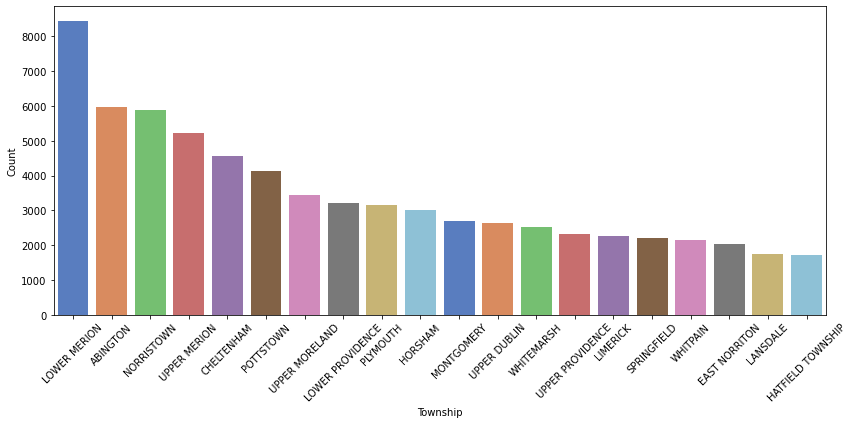

In [23]:
top_10_twp=pd.DataFrame(data['twp'].value_counts().head(20))
top_10_twp.reset_index(inplace=True)
top_10_twp.columns=['Township','Count']
fig2=plt.figure(figsize=(12,6))
g=sns.barplot(data=top_10_twp,x='Township',y='Count',palette="muted")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
fig2.tight_layout()

Different types of Emergency - 911 Calls

In [27]:
data["title"].value_counts()

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
Fire: UNCONSCIOUS SUBJECT              1
EMS: DISABLED VEHICLE                  1
Fire: SYNCOPAL EPISODE                 1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: DIABETIC EMERGENCY               1
Name: title, Length: 110, dtype: int64

Main category of emergency calls

In [28]:
data['Reason'] = data["title"].apply(lambda x: x.split(':')[0])

In [29]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Bar chart fo the main categories

<AxesSubplot:>

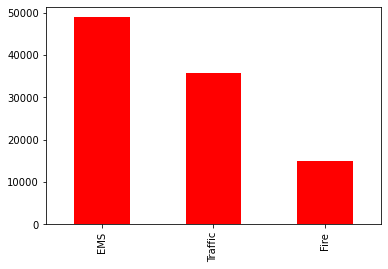

In [30]:
data['Reason'].value_counts().plot(kind='bar', color='red')

The distribution of main categories in the top 10 townships

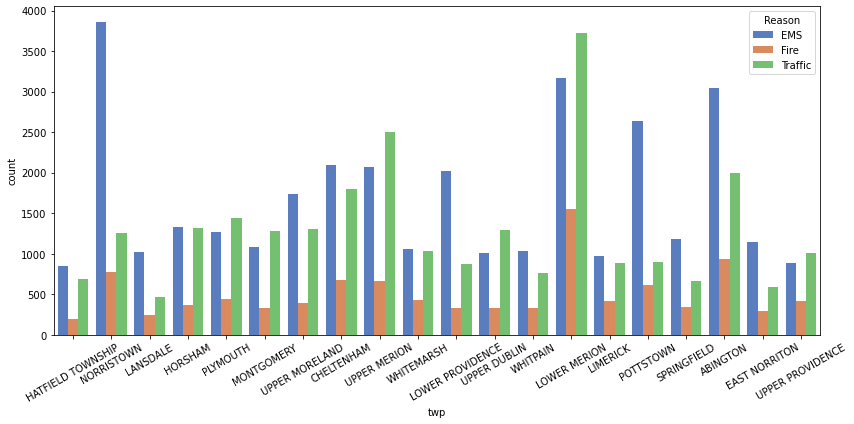

In [31]:
fig3=plt.figure(figsize=(12,6))
g=sns.countplot(data=data[(data['twp'].isin(top_10_twp['Township']))],x='twp',hue='Reason',palette='muted')
g_x=g.set_xticklabels(g.get_xticklabels(),rotation=30)
fig3.tight_layout()

TimeStamps Analysis

In [32]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [33]:
data['Hour']=data['timeStamp'].apply(lambda v:v.hour)
data['DayOfWeek']=data['timeStamp'].apply(lambda v:v.dayofweek)
data['Month']=data['timeStamp'].apply(lambda v:v.month)
data['Date']=data['timeStamp'].apply(lambda v:v.date())

In [34]:
# Map day values to proper strings
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['DayOfWeek']=data['DayOfWeek'].map(dmap1)

In [35]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,DayOfWeek,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,Thu,12,2015-12-10


Emergency Calls by Day of the Week

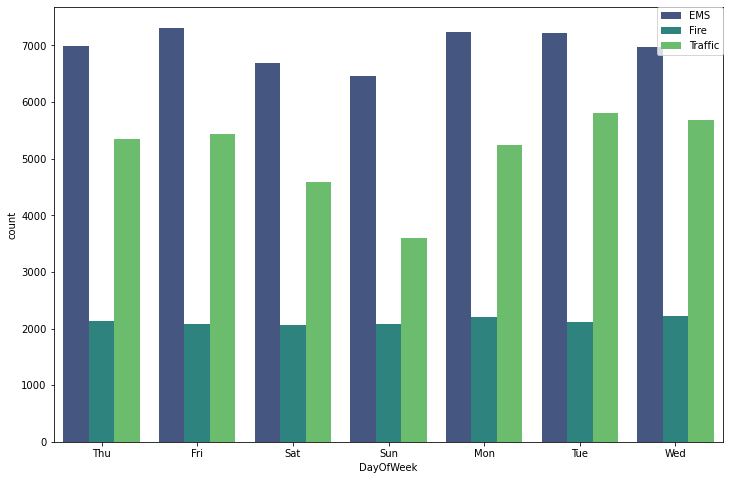

In [42]:
fig4=plt.figure(figsize=(12,8))
sns.countplot(x='DayOfWeek',hue='Reason',palette='viridis',data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

Now we can make a line plot

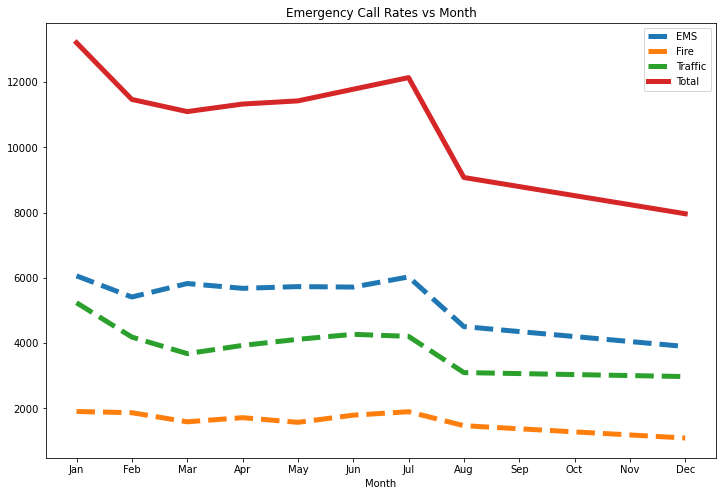

In [44]:
databyMonth_EMS = data[data['Reason']=='EMS'].groupby('Month').count()
databyMonth_Fire = data[data['Reason']=='Fire'].groupby('Month').count()
databyMonth_Traffic = data[data['Reason']=='Traffic'].groupby('Month').count()
databyMonth_Cumul = data.groupby('Month').count()

databyMonth_EMS['twp'].plot(figsize=(12,8),label='EMS',lw=5,ls='--')
databyMonth_Fire['twp'].plot(figsize=(12,8),label='Fire',lw=5,ls='--')
databyMonth_Traffic['twp'].plot(figsize=(12,8),label='Traffic',lw=5,ls='--')
databyMonth_Cumul['twp'].plot(figsize=(12,8),label='Total',lw=5)

fig=plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Emergency Call Rates vs Month")
plt.legend()

Regression line

Text(-9.075000000000003, 0.5, 'Counts')

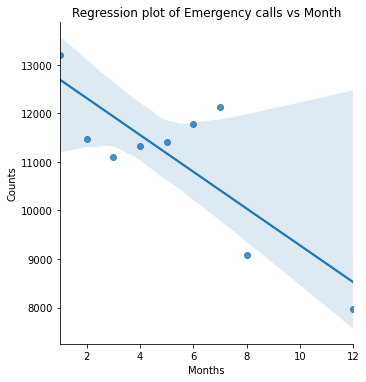

In [45]:
sns.lmplot(data=databyMonth_Cumul.reset_index(),x='Month',y='twp')
plt.title("Regression plot of Emergency calls vs Month")
plt.xlabel('Months')
plt.ylabel('Counts')

Now let's move on to creating heatmaps with seaborn and our data

In [53]:
daybyHour = data.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()
daybyHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='DayOfWeek'>

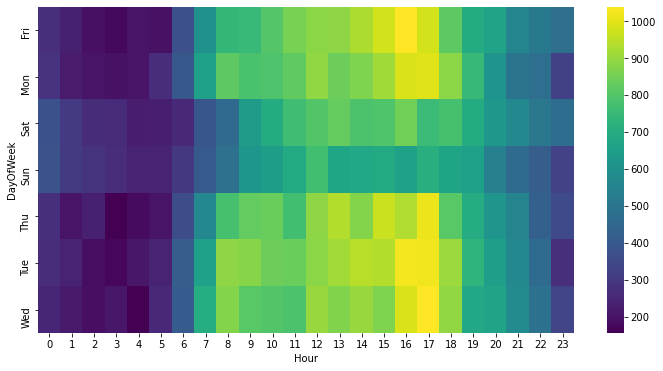

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(daybyHour,cmap='viridis')

### Done